# Introduction

In the chapter on exploratory data visualization, we noticed that 1791-1792 seemed to be a pivotal moment, so we can examine trends before and after to see how different the two periods in Constantine’s history really were. In the next section, I will describe more fully the measures I introduce briefly here. 
 
Between 1567 and 1792, governors’ average tenure was 8.5 years and their most common fate was non-violent. They may have died of illness or old age or simply been reassigned or left office of their own volition. However, from 1792 on, governors’ average tenure dropped sharply to just a little over 2 years and they were far more likely to be assassinated. In fact, there was a 76 percent chance that a governor serving in the period between 1792 and 1837 would be put to death. 

### 1. Ensure you've installed the packages we will use in this lesson

In [2]:
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("modeest")

### 2. Add the packages to the library

In [3]:
library(dplyr)
library(ggplot2)
library(modeest)
library(rstatix)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 3. "Read in" your data as a data frame

In [4]:
GovData.SimplifiedFates <- read.csv("~/Dropbox/Scholarship/AhmedBey/Data/GovernorsData-Git/GovData/GovData-SimplifiedFates.csv")
#GovData.SimplifiedFates

In [5]:
fates <- as_tibble(data.frame(GovData.SimplifiedFates))
#fates

### The following code generates pie charts to visualize the differences in governors' fates before 1792 and after 1791.

1. Filter your dateframe by date using <em>filter</em>. 
2. Create a summary using <em> group_by</em> and <em>summarize</em>. 
3. Calculate the percentages of governors' fates in each period using <em>mutate</em>.
4. Finally, create the pie chart.

In [6]:
dataPre1792fates <- filter(fates, End.Date < 1792)
#dataPre1792fates

In [7]:
#Create a pivot table to count up how many governors met each fate before 1792.

dataPre1792fatesSummary <- dataPre1792fates %>% group_by(Fate) %>% summarize(count = n())
#dataPre1792fatesSummary

In [8]:
#Calculate the percentage of governors who met each fate.

dataPre1792fatesPercent <- dataPre1792fatesSummary %>% mutate(per=paste0(round(count/sum(count)*100, 2), "%"))

#View the resulting table.
dataPre1792fatesPercent

,Fate,count,per
,<chr>,<int>,<chr>
1,Killed in battle,3,12%
2,Non-Violent Fate,14,56%
3,Unknown,4,16%
4,Willful Violent Removal,4,16%


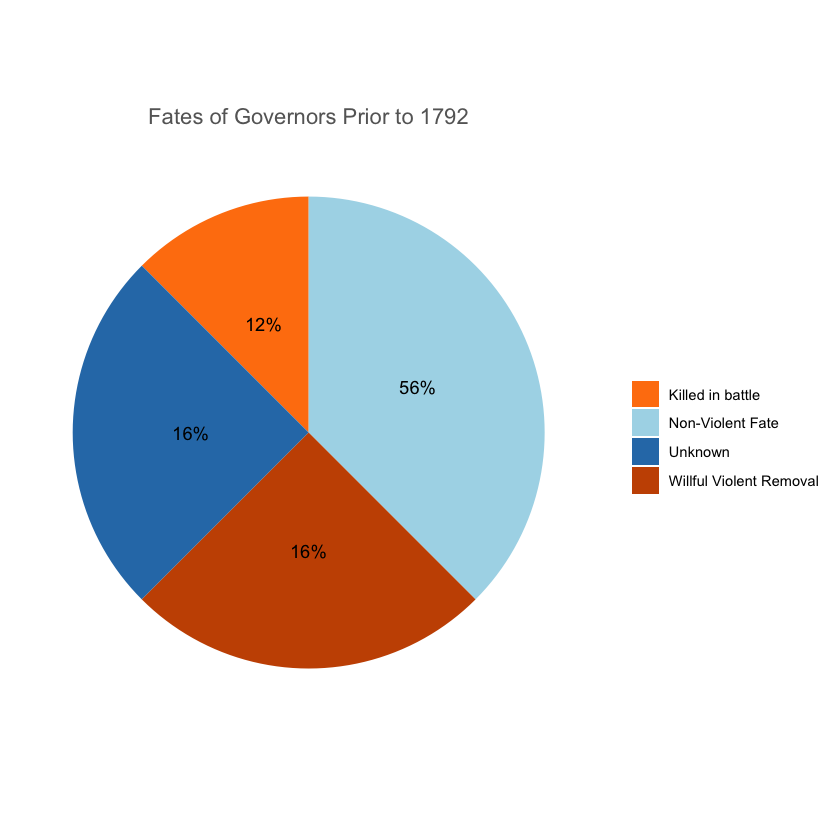

In [9]:
#Generate a pie chart to visualize the fates of the governors using the following 5 steps.

#1. Create a basic bar
pie = ggplot(dataPre1792fatesPercent, aes(x="", y=per, fill=Fate)) + geom_bar(stat="identity", width=1)

#2. Convert to pie (polar coordinates) and add labels
pie = pie + coord_polar("y", start=0) +geom_text(aes(label = per), position = position_stack(vjust = 0.5))

#3. Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("#FF800E", "#abd9e9", "#2c7bb6", "#C85200"))

#4. Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "Fates of Governors Prior to 1792")

#5. Tidy up the theme by removing the axis text, tick marks, and labels and by setting the title color and position.
pie = pie + theme_classic() + theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), plot.title = element_text(hjust = 0.5, color="#666666"))

pie

In [10]:
dataPost1792fates <- filter(fates, End.Date > 1791)
#dataPost1792fates

In [11]:
dataPost1792fatesSummary <- dataPost1792fates %>% group_by(Fate) %>% summarize(count = n())
#dataPost1792fatesSummary

In [12]:
dataPost1792fatesPercent <- dataPost1792fatesSummary %>% mutate(per=paste0(round(count/sum(count)*100, 2), "%"))
dataPost1792fatesPercent

,Fate,count,per
,<chr>,<int>,<chr>
1,Killed in battle,1,4.76%
2,Non-Violent Fate,4,19.05%
3,Willful Violent Removal,16,76.19%


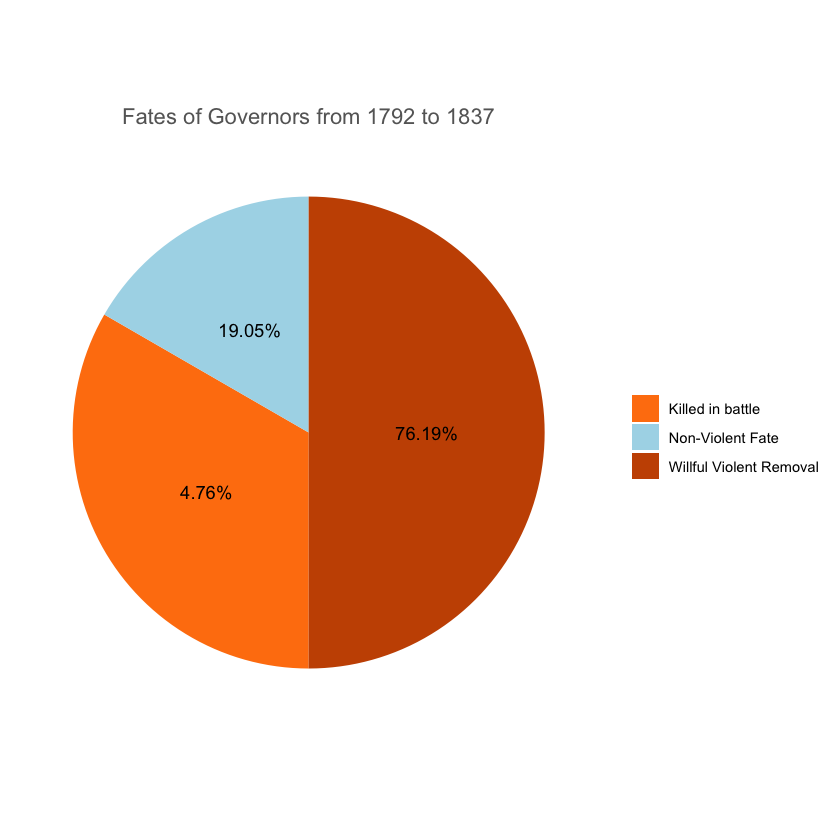

In [13]:
pie = ggplot(dataPost1792fatesPercent, aes(x="", y=per, fill=Fate)) + geom_bar(stat="identity", width=1)
pie = pie + coord_polar("y", start=0) +geom_text(aes(label = per), position = position_stack(vjust = 0.5))
pie = pie + scale_fill_manual(values=c("#FF800E", "#abd9e9", "#C85200"))
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "Fates of Governors from 1792 to 1837")
pie = pie + theme_classic() + theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), plot.title = element_text(hjust = 0.5, color="#666666"))

pie

In this lesson, we will explore the notion of representativeness, how to measure it, as well as how to make meaning and draw conclusions from these statistics. Concrete examples are always helpful and two governors do, in fact, fit the representative descriptions I have just given for each time period. Examining their stories reveals much about the differences between these two periods in Algerian history and may help to explain why the French were successful in their conquest of Algeria between 1830 and 1837.
 
As was true for many of Constantine’s governors, Omar Bey (r. 1679-1688) had strong ties to the previous governor and other key political figures in the region before his appointment to the top administrative and military position there. Presented as the son of the former governor, Omar may have been his biological son, but, more likely, the previous governor was Omar’s patron and benefactor, a connection they probably established as Janissaries, or elite soldiers in the Ottoman military. Prior to his nomination to the governorship, Omar was the commander of the Dey’s troops in Algiers with connections to the rulers of neighboring Tunisia. This made him a desirable leader for the eastern province, and he did, indeed, draw on these ties to ease tensions between the two states that had recently flared during a power struggle between two brothers for the governorship of Tunisia. Following his 1680 expedition against Tunis, the borders of Algeria remained secure for years. After governing and maintaining the region’s security for nine years, Omar died of natural causes in 1688, and power transferred peacefully to his successor, Chabane Bey, a kinsman of the current Dey. 
 
A little over a century later, Abd Allah Bey (r. 1804-1806), the Turkish son-in-law of a former governor, accepted the position in November 1804. The people greeted his nomination with joy and hope and welcomed him as a “liberator.” His warm reception may have been partly due to the people’s esteem for his local wife, Deikha. As we will see in chapter six, local women often served as arbiters of an Ottoman official’s merit. Algerian women’s acceptance of an Ottoman suitor was one of the most important seals of Constantinois approval. The fact that Deikha, the daughter and granddaughter of highly effective Ottoman governors in the region and elite Algerian women, consented to Abd Allah’s marriage proposal, signified his worthiness of office. Despite his wise leadership and local support, Abd Allah was unfortunate enough to govern Constantine during its most tumultuous and violent era. In 1806, in retaliation for Napoleon Bonaparte’s imprisonment of Algerians in Marseilles, Ahmed Dey of Algiers confiscated the French cessions (holdings) in Constantine and turned them over to England instead. The people of Constantine immediately protested the transfer. They had long-established, trusted trade relationships with the French agents in the cities of La Calle, Annaba (Bône), and Collo and were highly invested in their continuance. In an attempt to placate the local elite and prevent armed protest, Constantine’s governor, Abd-Allah Bey, transmitted his constituents’ message of outrage to the Dey, but he only succeeded in provoking the Dey’s anger. Despite his loyal service and prudent leadership, Ahmed dismissed Abd-Allah and sent out his personal guards to beat the governor to death under their batons. Death by strangulation was the customary means of assassination for high ranking officials because it did not mutilate the body. Abd-Allah’s Bey’s beating, therefore, signaled the Dey’s great displeasure and served as a warning to other political leaders. Governors were thus beholden to both the local elite and to the Dey; pleasing both often proved impossible, however, as the number of assassinations after 1791 attests. 

Compare these two vignettes and notice the significant differences in the outcomes for Omar and Abd Allah as representative governors for each era (pre-1792 and post-1791) in Constantine. Both were Turkish officials, most likely high ranking commanders in the Janissaries, with important local connections, but Omar’s tenure was four times longer than Abd Allah’s. What is more, Omar died of natural causes, whereas Abd Allah died a violent death under the cudgels of the Dey’s personal guards, evidence of a rift that had developed between Algiers and Constantine. In the rest of this chapter, we will examine the measures that help us to identify these two men as representative of the eras in which they served. Beginning with descriptive statistics, we will explore what various measures of center (mean, median, and mode) can tell us about the distribution of the data and what that means in the context of this case study. To define the dispersion of our data set with greater accuracy, we will then turn to look at different benchmarks in the data (minimum, lower and upper quartiles, interquartile range, maximum, and outliers), as well as how to visualize them. Then we apply these concepts to compare Ottoman governors’ experiences in Constantine, Algiers, Cairo, and Damascus. Finally, this chapter closes with an overview of measures of variance (standard deviation and z-scores) and applies them to developing a new periodization of Constantine’s history using governors’ tenures as an indicator of socio-political stability, or lack thereof. 


## Configuring your dataframe in R

In [14]:
#Read in the main dataset. Remove the hash (#) symbol below to view the data in a dataframe.
GovData.simple <- read.csv("~/Dropbox/Scholarship/AhmedBey/Data/GovernorsData-Git/GovData/GovData-simple.csv")
GovData <- as_tibble(data.frame(GovData.simple))
#GovData

In [15]:
#You can reorder the cases (rows) in the dataframe using arrange(). Remove the hash (#) symbol below to view the adjusted order.
GovData_tenure <- arrange(GovData, desc(Tenure..Years.))
#GovData_tenure

In [16]:
#Select only the variables you're going to work with.
GovData <- select(GovData, Name.in.Sources, Start.Year, End.Year, Tenure..Years., Fate, Ethnicity)

#Preview the data
head(GovData, 5)

Name.in.Sources,Start.Year,End.Year,Tenure..Years.,Fate,Ethnicity
<chr>,<int>,<int>,<dbl>,<chr>,<chr>
Ramdane-Tchoulak Bey,1567,1574,7,Reassigned,Ottoman
Djaafar Bey,1574,1588,14,Reassigned,Ottoman
Mohammed Ben Ferhat Bey,1588,1608,20,Killed in battle,Algerian
Hassan Bey,1608,1622,14,Died of illness,Ottoman
Mourad bey,1622,1647,25,Died of illness,Ottoman


## Descriptive Statistics

Why should historians, humanists, and other humanistic social scientists embrace an empirical approach to their study? Under what circumstances does this approach make sense? According to Princeton Sociologist, Scott M. Lynch, “there are three main purposes of statistics: summarizing data, making inferences from samples to populations, and predicting (or “forecasting”) future—or at least unobserved—events based on extant data.” So what does this mean for humanistic study? 
 
Just as in the social sciences, statistics enable humanities scholars to:
<ul><li>Summarize a sample or population, which, in turn, allows us to understand the structure and “central tendencies” of a society, which may illuminate important features of that society, especially when used in conjunction with comparison</li>
    <li>Make predictions about a population from a sample</li>
    <li>Contextualize an individual case within a larger population or system</li>
<li>Test hypotheses about correlations between variables to determine if, and what type of, relationship existed</li></ul>
 
In the context of the present case study, I am studying the governors of Constantine as a whole group, or population (a defined set of individuals or objects), so they are best understood together and in comparison with one another, which suggests that descriptive statistics will be highly useful in my attempt to understand their lives, experiences, and what they mean in and for the history of the Ottoman Empire. 
 
An empirical approach also facilitates a comparative study between Constantine and other provinces, which sheds light on both questions of representativeness and uniqueness within the Empire. What was “normal” or representative and what constitutes an outlier? How did one governor’s experience align with, or diverge from, those of his fellows both locally and across the Arab provinces?
 
It is important to note how the term <b>“representative”</b> is used in both History and Statistics. In History, when we talk about the representativeness of a person or event or source, we are referring to whether or not that person or event or source may stand in for a number of other similar ones, such that developing an understanding of this one will shed light on many others. In a parallel way, the representativeness of a sample in Statistics refers to constancy of feature proportions across the sample and the entire population, such that reliable inferences may be made from the specific sample to the population. Measures of central tendency, such as mean, median, and mode, are one way to develop a definition of “representativeness” in our data. These measures describe the location of our data and, as the name suggests, provide different ways of identifying its center. In the next section, we’ll examine how measures of center can be used to gain insight into our data, and in the following, we’ll explore the spread of data around the center, or measures of dispersion.

### Measures of Central Tendency

<ul><li><b>Mean (arithmetic mean):</b> sum of all values divided by the total number of observations. Sensitive to outliers.</li>
    <li><b>Median:</b> the middle value in an ordered list. Unaffected by outliers</li>
    <li><b>Mode:</b> the most common value. Unaffected by outliers</li>
</ul>


#### Mean
By determining what was average, representative or common in each of the two time periods, we develop a better understanding of society and politics in each. When we extend our analysis beyond Constantine, we can contextualize this region within the larger scope of Algeria and the Ottoman Empire to reveal patterns in the larger political systems of which Constantine was a part. These measures include the mean, median, and mode. The mean, technically, the “arithmetic mean,” is the sum (Σ) of all values in a field divided by the field’s total number of observations. Just as a reminder, I refer to the collection of a variable’s individual case values as a field. For example, in our data set, to find the mean of the pre-1792 governors’ tenures, we simply add the tenures of each governor who served between 1567 and 1791 and divide by the total number of governors. The calculations for both means presented in this chapter’s introduction are shown below.

We know that some governors held office for more time and others for less than these means, but the notable difference between the mean tenure of governors who served prior to 1792 and those who served after 1791 is a first indication that something, and perhaps many things, changed dramatically in the years following 1791. It is also worth noting that outliers, or uncharacteristically large and small values, have an effect on the mean. For this reason, it is useful to compare the mean with both the mode and median, which are unaffected by outliers, and to examine the five-number summary of a sample or population.
 
Before describing and comparing the next two measures of center, it is necessary to explain how one governor’s data, in particular, has been handled. Salah Bey ruled between 1771 and 1792; it was his assassination that marked the dramatic rupture that Constantine experienced, which signaled immense social and political unrest and a sharp decline in the region’s fortunes for the next 33 years. For this reason, his assassination has been counted among the fates of governors post-1791, but because all but a few months of his long tenure belonged to the previous period of peace and prosperity, his tenure has been included in the pre-1792 data set to calculate the statistics described in this section.

In [17]:
dataPre1792 <- filter(GovData, End.Year<1792)
#dataPre1792

In [18]:
dataPost1792 <- filter(GovData, End.Year >1791)
#dataPost1792

In [19]:
mean(dataPre1792$Tenure..Years.)

[1] 8.106667

In [20]:
mean(dataPost1792$Tenure..Years.)

[1] 3.172983

#### Median
 
The median of a data set is the middle value in an ordered list. Mathematically, the formula to find the median is as follows. Note the differences between the formulas for even and odd numbers of values in the data set. If there is an odd number of values n, the median can be found by adding one to n and dividing by two, then identifying this position in the ordered list. For example, if there were 9 values in a data set, the median would be X[9+12] = X[5], or the 5th value in the ordered list of values X. If n is even, the average of the two middle values is calculated.

One way to think about the median is as the data set’s spatial center, regardless of the values. You can see this visually in Tables 1 and 2 above. The median tenure for governors in the later period was just two years, significantly lower than the median tenure of six years for governors who served between 1567 and 1791, which suggests that governors generally held office for remarkably shorter terms in the later period than the earlier. Comparing the sample means and the medians allows us to infer that there may have been a couple of governors who served several years longer than the median of two years, but most governors’ tenures were less than three years. Remember that the median tells us that half of the governors served two or fewer years. Likewise, since the mean prior to 1792 is 2.6 years longer than the median of six years, several governors must have served terms significantly longer than six years.

In [21]:
median(dataPre1792$Tenure..Years.)

[1] 6

In [22]:
median(dataPost1792$Tenure..Years.)

[1] 2

#### Mode

The last measure of center, the mode of a data set, is simply the most frequently occurring value. If a data set is <b>normally distributed</b>, this value will be at or close to the mean, but if the mode is greater or less than the mean, it signals that your data is likely <b>skewed</b>, which is discussed in greater detail in the next section. In our example, the mode tenure for governors who ruled between 1567 and 1791 is 3 years, which you can also quickly identify in the table above or use a histogram to show the frequencies of tenure values either as individual cases or aggregated into intervals, and the mode for the later period is 1 year. (Note: if you aggregate your data into intervals, your median and mode will also be intervals.) 

In [23]:
mfv(dataPre1792$Tenure..Years.)

[1] 3

In [24]:
mfv(dataPost1792$Tenure..Years.)

[1] 1

So how might we define a representative governor in each of our sample periods?

| 1567-1791 |           |           |1792-1837  |
|-----------|-----------|-----------|-----------|
| Mean      | 8.6 years | Mean      | 2.3 years |
| Median    | 6 years   | Median    | 2 years   |
| Mode      | 3 years   | Mode      | 1 year    |

To summarize the measures of center presented above, we can say: On average, governors who served before 1792 served 8.6 years in office, whereas after 1791, governors only served, on average, 2.3 years in office. Prior to 1792, 50 percent of these governors served 6 years or fewer, and 50 percent served 6 years or more, but after 1791, this value declined to just 2 years. The most common tenure length was 3 years before 1792, but only a single year after 1791. This gives us a sense of a “representative” governor’s experience. By every measure of center, governors’ tenures were far shorter after 1791. In the next chapter, we will examine some possible reasons for this significant shift.  In the meantime, how do we summarize all of the data of both periods to understand how representative governors’ experiences compared with the rest? This is the kind of information that the five-number summary and measures of dispersion will tell us. 


## Summarizing Data

<ul>
    <li><b>Minimum:</b> The smallest value of a data set.</li>
    <li><b>Maximum:</b> The largest value of a data set.</li>
    <li><b>Quartiles:</b> Divides a sample or population data set into four equal groups, and the values at which 25%, 50%, and 75% of the data lies below in an ordered list are called quartiles. In an ordered list of values, the lower quartile, or quartile 1, is the middle value between the minimum and the median, and the upper quartile, or quartile 3, is the middle value between the median and the maximum.</li>
    <li><b>5-Number Summary:</b> A listing of five of the basic descriptive statistics of a data set: the minimum, lower quartile, median (or quartile 2), the upper quartile, and the maximum.</li>
    <li><b>Range:</b> The difference between the maximum and minimum values, calculated as Maximum - Minimum.</li>
    <li><b>Interquartile Range (IQR):</b> The difference between lower and upper quartile, calculated as Q3-Q1. Note: 50% of the data is concentrated between the lower and upper quartile.</li>
    <li><b>Outlier:</b> Any value in the data set that lies outside Q3 + 1.5*IQR or Q1 - 1.5*IQR.</li>
    <li><b>Normal Distribution:</b> A distribution in which the mean, median, and mode are equal, and the distribution is perfectly symmetrical around the mean.</li>
    <li><b>Skewness:</b> The lack of symmetry in a graphed distribution. A positively skewed data set has a graph that shows a long tail to the right, and a negatively skewed data set has just the opposite. </li>
</ul>

The tables below provide the 5-number summaries, along with the mode and mean for each of the samples we’re exploring: Pre-1792 and Post-1791 gubernatorial tenures. A 5-number summary includes the following basic statistics: the minimum, lower quartile, median (or quartile 2), the upper quartile, and the maximum. The purpose of such summaries is to indicate the distribution of the data. By adding the mean and mode to this summary, we can tell if the data is normally distributed, or skewed (non-symmetrical). 

<b>Pre-1792 Five-Number Summary + Mode & Mean</b>

| Minimum | Q1 | Median | Q3 | Maximum | Mode | Mean |
|---------|----|--------|----|---------|------|------|
| 0.33    | 3  | 6      | 14 | 25      | 3    | 8.60 |

<b>Post-1792 Five-Number Summary + Mode & Mean</b>

| Minimum | Q1 | Median | Q3 | Maximum | Mode | Mean |
|---------|----|--------|----|---------|------|------|
| 0.008   | 1  | 2      | 3  | 11      | 1    | 2.28 |

A <b>5-number summary</b> includes the following basic statistics: the minimum, lower quartile, median (or quartile 2), the upper quartile, and the maximum. The purpose of such summaries is to indicate the distribution of the data. By adding the mean and mode to this summary, we can tell if the data is normally distributed, or skewed (non-symmetrical). 

At a glance, the summary tables above reveal that by every measure, governors served shorter terms after 1791. What is more, they indicate that the data in the pre-1792 sample are more spread out (between a minimum of 4 months to a maximum of 25 years) than in the post-1791 sample (just a few days to 11 years). A bar graph of the frequency of governors’ tenure lengths depicts some of this information visually, but there is a better way to visualize the 5-number summary and measures of central tendency. 

After reading the chapter on exploratory data visualization and practicing visualization construction with the case study data and/or with your own data set, you are now more familiar with a variety of data visualization types, but all of these charts either depict the individual values in the data set or an aggregation of them. A <b>box plot</b> or <b>box-and-whisker plot</b>, on the other hand, is a graph of a data summary, rather than the individual or even aggregated values of the data set. You can think of box plots as providing a top-level view of your data. This is important to remember when analyzing this type of visualization. Because of this difference, box-plots allow us to compare measures of center (or various indications of representative values), as well as distributions across data sets rather than across individual values within or between data sets. 


![alt text](https://miro.medium.com/max/4800/1*2c21SkzJMf3frPXPAR_gZA.png "How to read a boxplot")
Image from: Michael Galarnyk, <a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">"Understanding Boxplots,"</a> <em>Towards Data Science</em>, (11 September 2018).

In [27]:
#read in the dataset and select the variables to keep
df <- select(GovData.simple, Name.in.Sources, Start.Year, End.Year, Tenure..Years., Fate, Ethnicity)
#copy this dataset and "coerce" [term from computer science; let's see if we can find an alternative term!] it into a data frame object
df <- as_tibble(data.frame(df))

#Create a new column to signal the difference between the eras. 1 represents 1567-1791, and 2 represents 1792-1837.
Era <- c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)

#Add the column to the data frame
df$Era=Era

#Set the new data type of the new column's variable to "factor."
df$Era <- as.factor(df$Era)

#Preview the data and double check that the new column is there and listed as a factor.
head(df, 5)

Name.in.Sources,Start.Year,End.Year,Tenure..Years.,Fate,Ethnicity,Era
<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<fct>
Ramdane-Tchoulak Bey,1567,1574,7,Reassigned,Ottoman,1
Djaafar Bey,1574,1588,14,Reassigned,Ottoman,1
Mohammed Ben Ferhat Bey,1588,1608,20,Killed in battle,Algerian,1
Hassan Bey,1608,1622,14,Died of illness,Ottoman,1
Mourad bey,1622,1647,25,Died of illness,Ottoman,1


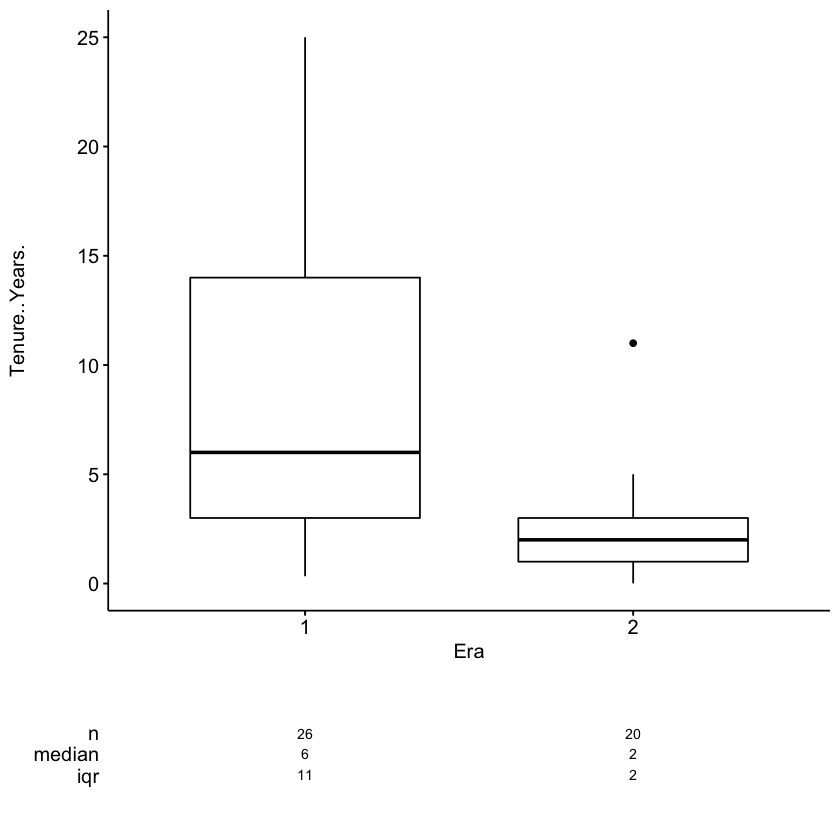

In [30]:
#Create basic boxplots to compare the differences between the two eras.
ggsummarystats(df, x="Era", y="Tenure..Years.", ggfunc = ggboxplot)

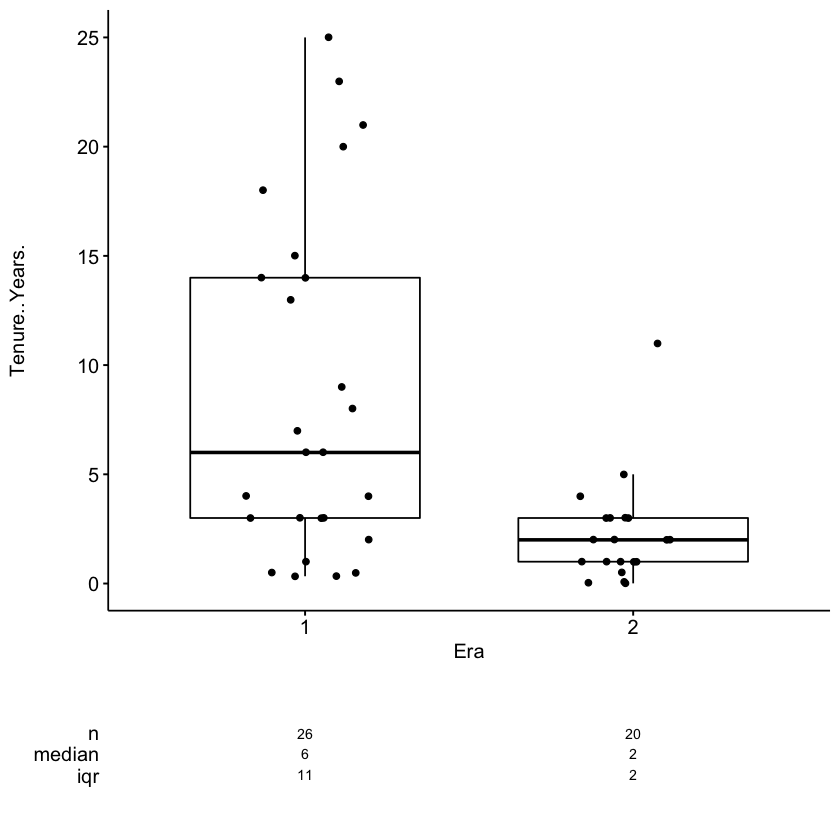

In [31]:
#Add data to the boxplots
ggsummarystats(df, x="Era", y="Tenure..Years.", ggfunc = ggboxplot, add="jitter")

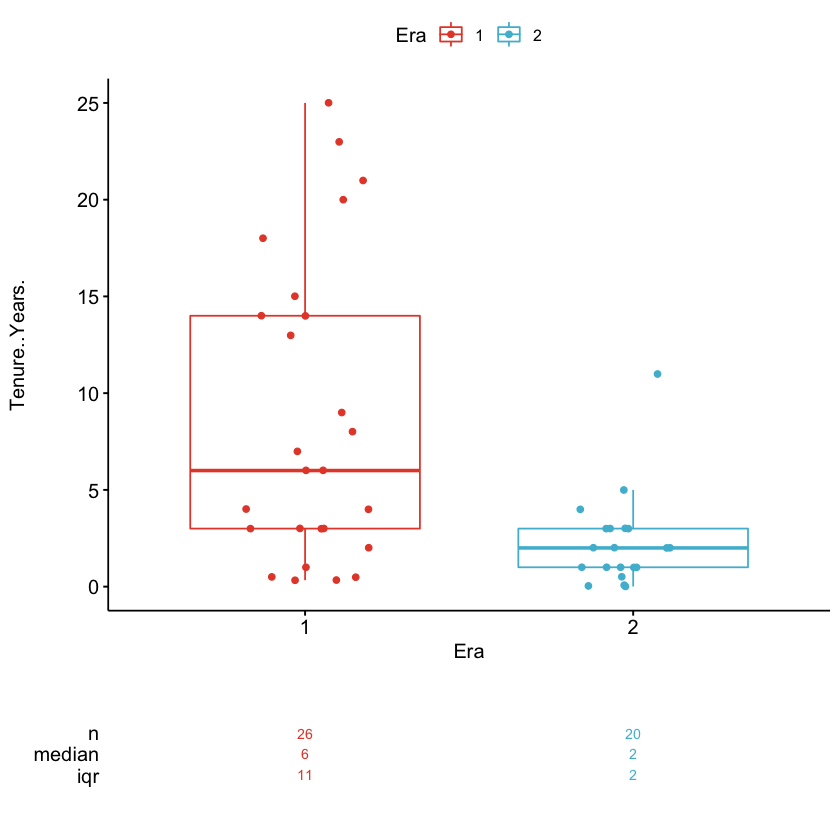

In [32]:
#Add color to the boxplots to make distinguishing between the two easier.
#For more information on color palettes, see: http://rpkgs.datanovia.com/ggpubr/reference/get_palette.html

ggsummarystats(df, x="Era", y="Tenure..Years.", ggfunc=ggboxplot, add="jitter", color = "Era", palette = "npg")

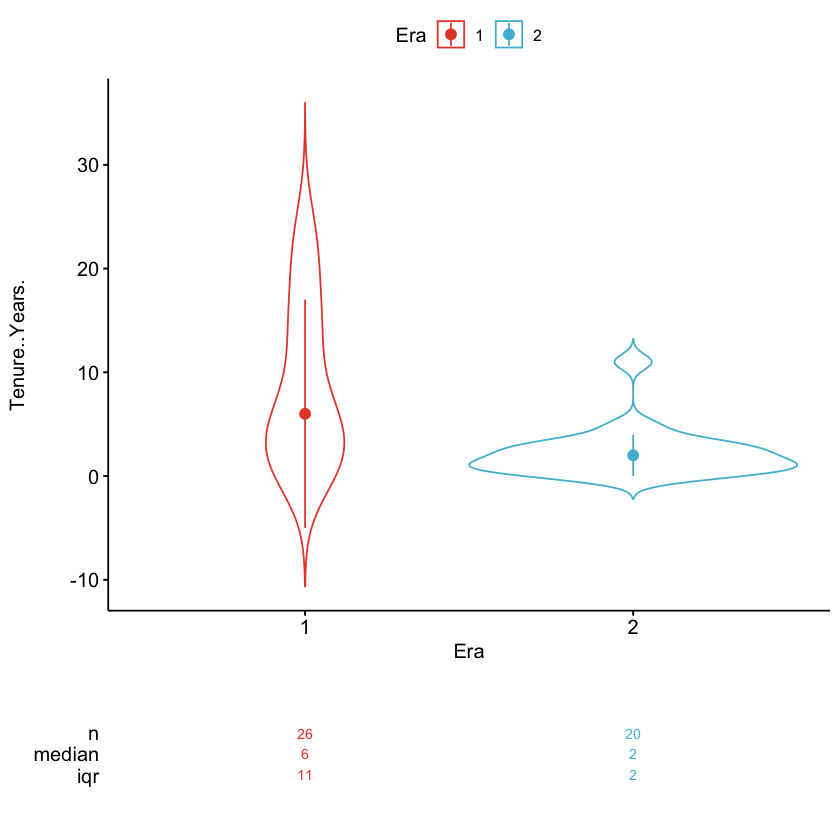

In [33]:
#Create a violin plot to get a better sense of the shape, as well as the dispersion of the data.
ggsummarystats(df, x="Era", y="Tenure..Years.", ggfunc = ggviolin, add = c("median_iqr"), color = "Era", palette = "npg")

## Measures of Dispersion

### Standard Deviation

In the section above, we examined summary statistics of the governors’ data, including the dataset’s minimum, median, maximum, lower and upper quartiles, and briefly presented the mean, or average, of the governors’ lengths of tenure. Once the mean has been calculated, we can then determine the <b>standard deviation</b>, which indicates the extent to which the tenure lengths vary over the 270-years of Ottoman rule in the eastern province. This measure is calculated by dividing the sum of the squares of the difference between each data point and the mean by the number of data points. 

In [40]:
#Filter the above dataframe of the entire population based on era to create to sample datasets for the first
#era (1567-1791) and the second era (1792-1837).

df1 <- filter(df, Era==1)
df2 <- filter(df, Era==2)

#Calculate the standard deviations for governors' tenures in each era
sd1 <- sd(df1$Tenure..Years.)
sd1
sd2 <- sd(df2$Tenure..Years.)
sd2

[1] 7.799014

[1] 2.461726

The above standard deviation measures for the era 1567-1791 and 1792-1837 confirm that the data in the former sample are much more dispersed than the data in the latter sample, as indicated visually by the boxplots and violint plot above.

### Z-Scores

Several identifiable periods of Ottoman rule emerge as we examine a graph of the data set’s z-scores, which, because of the nature of the data, are plotted over time. 


In [42]:
#calculate the means for each of these samples and save them as variables
m <- mean(df$Tenure..Years.)
std_dev <- sd(df$Tenure..Years.)

#calculate the z-scores
z <- ((df$Tenure..Years.-m)/std_dev)

#add the z-scores to the dataframe as a new column and preview the results

df$z_scores=z
head(df1, 4)

Name.in.Sources,Start.Year,End.Year,Tenure..Years.,Fate,Ethnicity,Era,z_scores
<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<fct>,<dbl>
Ramdane-Tchoulak Bey,1567,1574,7,Reassigned,Ottoman,1,-0.2054829
Djaafar Bey,1574,1588,14,Reassigned,Ottoman,1,0.6920665
Mohammed Ben Ferhat Bey,1588,1608,20,Killed in battle,Algerian,1,1.4613945
Hassan Bey,1608,1622,14,Died of illness,Ottoman,1,0.6920665


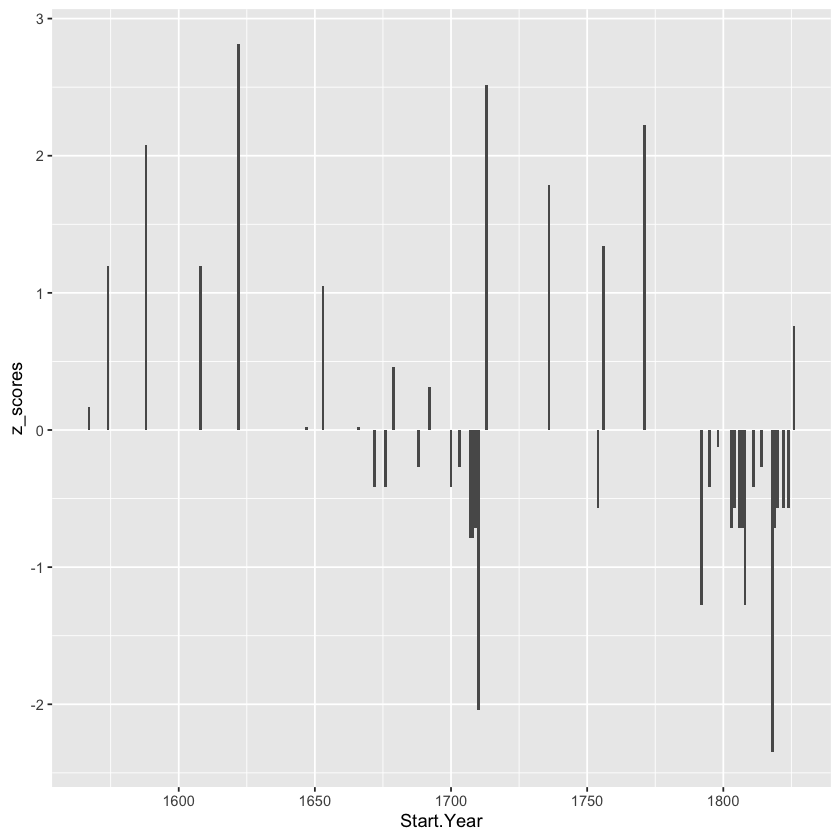

In [50]:
#Create a bar graph of the z-scores using geom_col rather than geom_bar. The latter generates bar heights that are
# proportional to the number of cases in each group, but we want the bar heights to represent the values of the 
# z-scores instead. For more see: https://ggplot2.tidyverse.org/reference/geom_bar.html.

ggplot() + geom_col(data=df, aes(x = Start.Year, y = z_scores), width=1)

The z-scores and their distribution provide a plethora of information about the governors of Constantine between 1567 and 1837. For instance, we can use the z-score distribution to think about periodization because they may be used to identify turning points and significant events that might have contributed to these pivots. This z-scores visualized in Figure __ confirms patterns I noticed while close reading the source materials. With the installation of Kheir-ed-Dine Bey in 1672 (or perhaps beginning with Redjeb, whose tenure of 6 years is only slightly above the mean), we notice the beginning of a period of instability in the governors’ tenure that continues through 1713. During this period, ten of the twelve beys served fewer years than the average of 5.85.  The first assassinations began occurring during this period and that, apart from the two provincial governors who governed longer than the average tenure and died in office, governors were either reassigned or were assassinated.